We have imported the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Loading the csv dataset and viewing it

In [ ]:
df = pd.read_csv('/content/kidney_disease.csv', index_col='id')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


Checking if there are any missing values.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


Sorting the number of missing values in decreasing order.

In [ ]:
missing_values_sorted = missing_values.sort_values(ascending=False)

print(missing_values_sorted)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


Checking if there are any duplicate rows.

In [ ]:
duplicate_counts = df.value_counts()
num_duplicates = duplicate_counts[duplicate_counts > 1].sum()

print(num_duplicates)

0


Viewing the description and info of the dataset.

In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


Renaming the columns for ease of understanding.

In [ ]:
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

The fields *packed_cell_volume, white_blood_cell_count and red_blood_cell_count* are of object datatype, so we are converting them to numeric datatype.

In [ ]:
df['packed_cell_volume']     = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']   = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In the following code, we are finding all the unique possible values in each column of the dataset.

In [ ]:
unique_values = {col: df[col].nunique() for col in df.columns}

for col, num_unique in unique_values.items():
    print(f'{col} has {num_unique} unique values')

age has 76 unique values
blood_pressure has 10 unique values
specific_gravity has 5 unique values
albumin has 6 unique values
sugar has 6 unique values
red_blood_cells has 2 unique values
pus_cell has 2 unique values
pus_cell_clumps has 2 unique values
bacteria has 2 unique values
blood_glucose_random has 146 unique values
blood_urea has 118 unique values
serum_creatinine has 84 unique values
sodium has 34 unique values
potassium has 40 unique values
hemoglobin has 115 unique values
packed_cell_volume has 42 unique values
white_blood_cell_count has 89 unique values
red_blood_cell_count has 45 unique values
hypertension has 2 unique values
diabetes_mellitus has 5 unique values
coronary_artery_disease has 3 unique values
appetite has 2 unique values
pedal_edema has 2 unique values
anemia has 2 unique values
class has 3 unique values


In the following code we are separating and counting the number of numerical and categorical columns.

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(f'There are {len(cat_cols)} categorical columns.')

print(f'There are {len(num_cols)} numerical columns.')

There are 11 categorical columns.
There are 14 numerical columns.


Exploring the categorial columns to find all the possible categories in each column and their frequencies.

In [ ]:
for col in cat_cols:
    print(f'Column {col} has {df[col].nunique()} unique values: {df[col].unique()}')

for col in cat_cols:
    print(f'\nFrequency of unique values in {col}:')
    print(df[col].value_counts())


Column red_blood_cells has 2 unique values: [nan 'normal' 'abnormal']
Column pus_cell has 2 unique values: ['normal' 'abnormal' nan]
Column pus_cell_clumps has 2 unique values: ['notpresent' 'present' nan]
Column bacteria has 2 unique values: ['notpresent' 'present' nan]
Column hypertension has 2 unique values: ['yes' 'no' nan]
Column diabetes_mellitus has 5 unique values: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Column coronary_artery_disease has 3 unique values: ['no' 'yes' '\tno' nan]
Column appetite has 2 unique values: ['good' 'poor' nan]
Column pedal_edema has 2 unique values: ['no' 'yes' nan]
Column anemia has 2 unique values: ['no' 'yes' nan]
Column class has 3 unique values: ['ckd' 'ckd\t' 'notckd']

Frequency of unique values in red_blood_cells:
red_blood_cells
normal      201
abnormal     47
Name: count, dtype: int64

Frequency of unique values in pus_cell:
pus_cell
normal      259
abnormal     76
Name: count, dtype: int64

Frequency of unique values in pus_cell_clumps:
pus_ce

Cleaning up the categories to have standard values.

In [ ]:
df['diabetes_mellitus'].replace(to_replace={'\tno':'no',
                                            '\tyes':'yes',
                                            ' yes':'yes'},
                                inplace=True)
df['coronary_artery_disease'].replace(to_replace={'\tno':'no'},
                                      inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd',
                                'notckd':'not ckd'},
                    inplace=True)

Mapping the class column to 0 or 1.

In [ ]:
df['class'] = df['class'].map({'ckd':0, 'not ckd':1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

Checking if the categorical columns have been updated correctly.

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f'{col} has {df[col].unique()} values')

diabetes_mellitus has ['yes' 'no' nan] values
coronary_artery_disease has ['no' 'yes' nan] values
class has [0 1] values


Exploring the values in numeric columns.

In [ ]:
df[num_cols].apply(lambda x: print(f'{x.name} has {x.unique()} values'))

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values
blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values
specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values
albumin has [ 1.  4.  2.  3.  0. nan  5.] values
sugar has [ 0.  3.  4.  1. nan  2.  5.] values
blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 

age                       None
blood_pressure            None
specific_gravity          None
albumin                   None
sugar                     None
blood_glucose_random      None
blood_urea                None
serum_creatinine          None
sodium                    None
potassium                 None
hemoglobin                None
packed_cell_volume        None
white_blood_cell_count    None
red_blood_cell_count      None
dtype: object

<ipython-input-32-88280eaab91e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], color='purple', shade=True)
<ipython-input-32-88280eaab91e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], color='purple', shade=True)
<ipython-input-32-88280eaab91e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], color='purple', shade=True)
<ipython-input-32-88280eaab91e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[col], color='purple', shade=True)
<ipython-inp

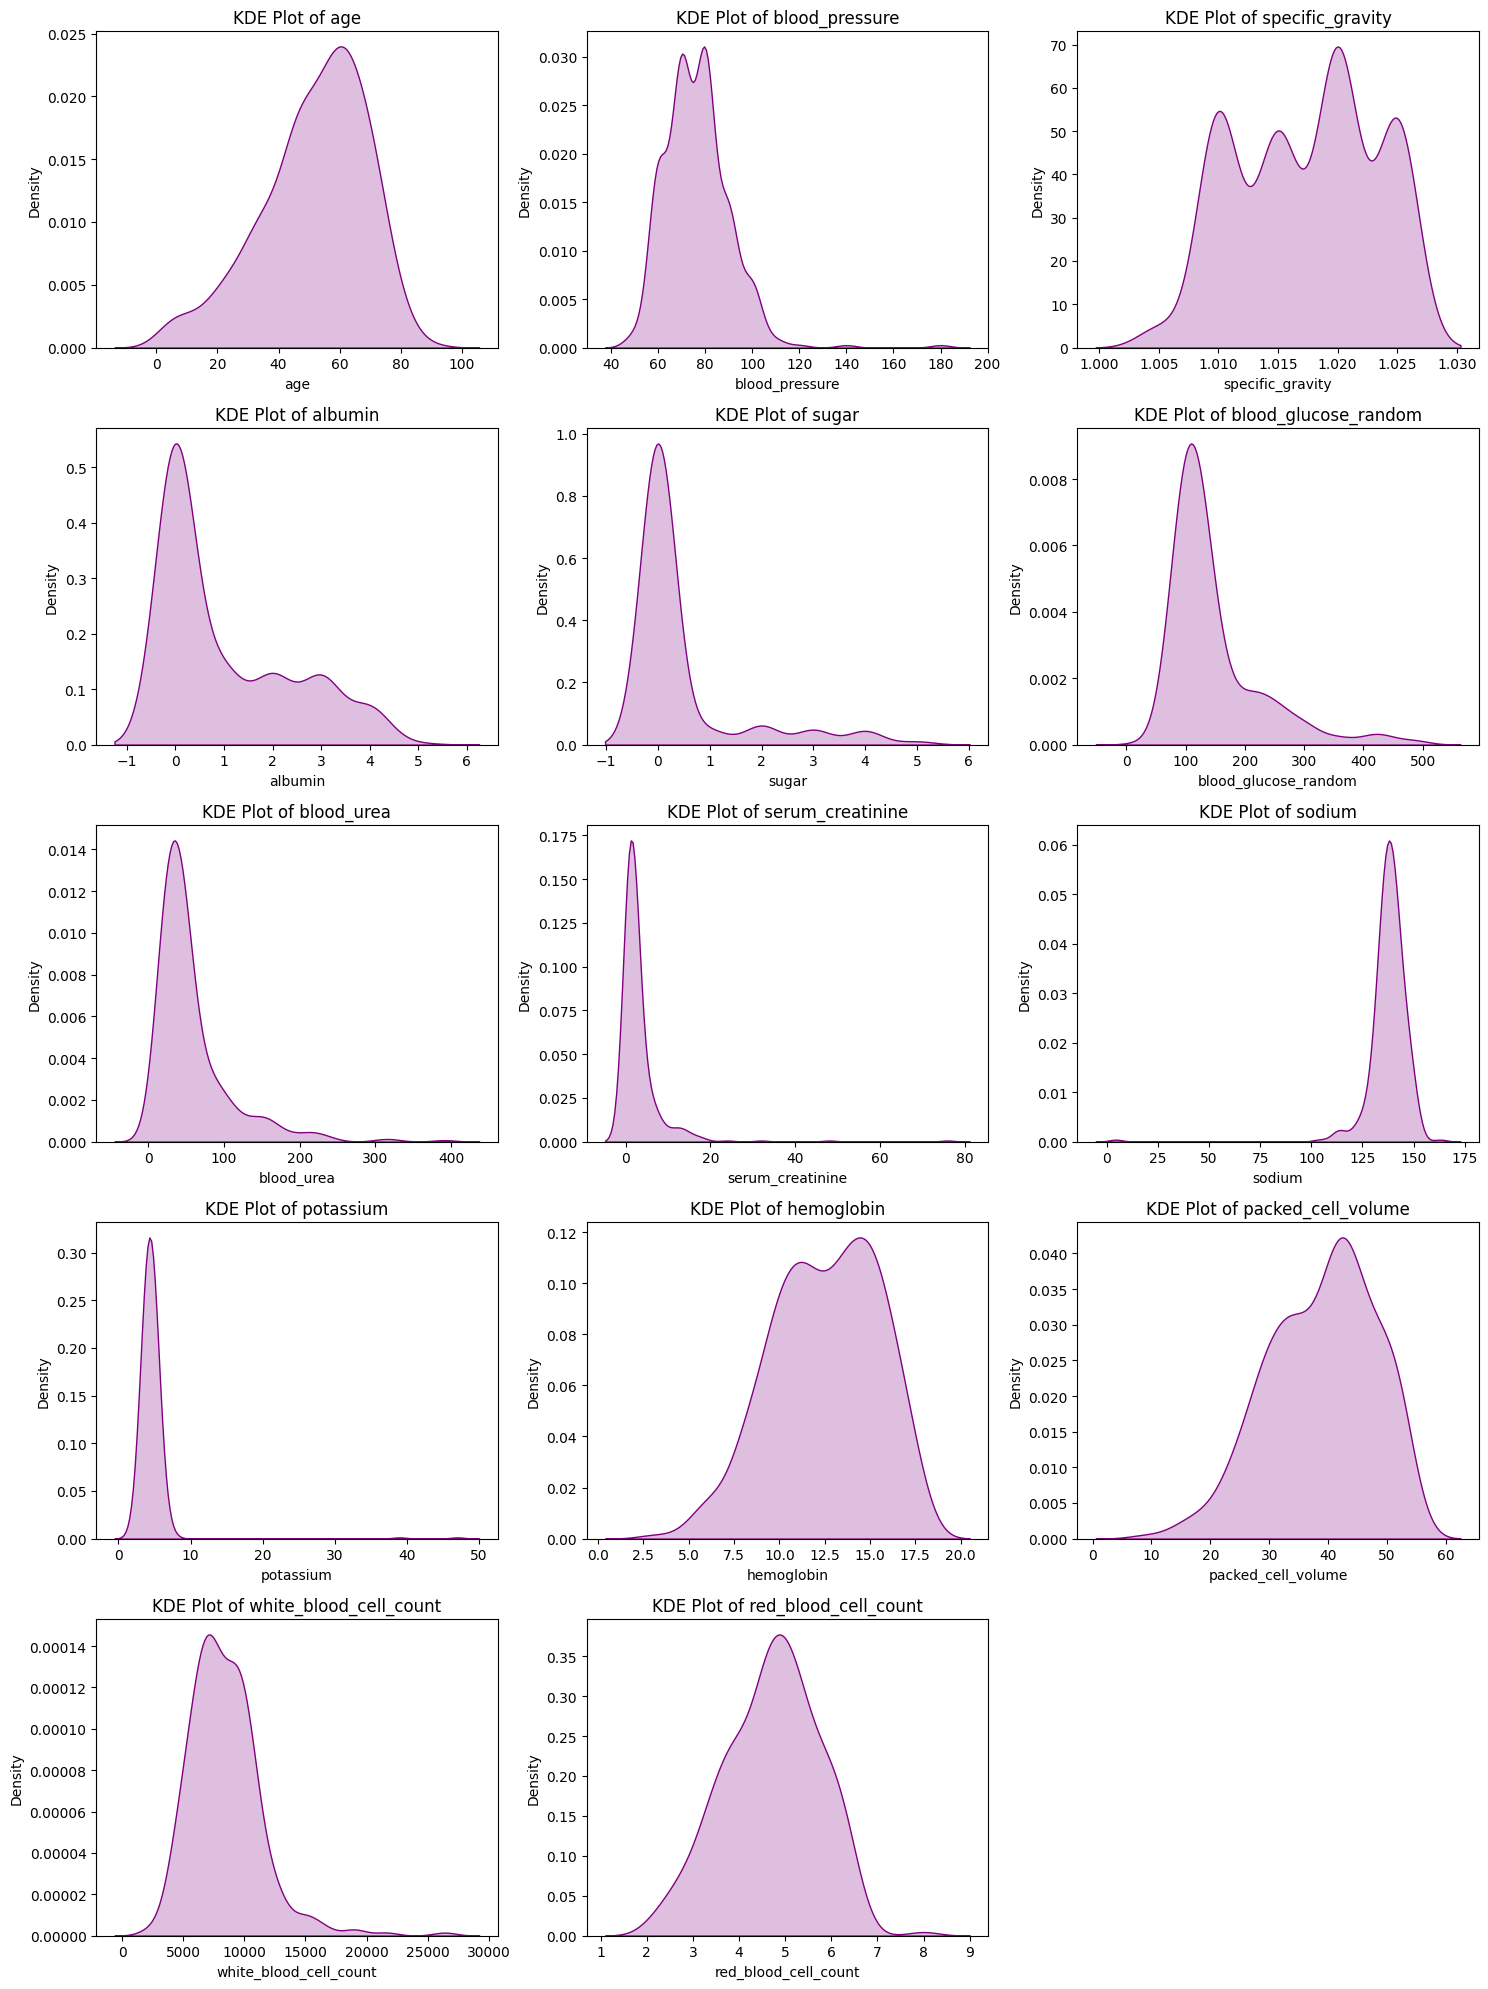

In [ ]:
plt.figure(figsize=(15, 20))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.kdeplot(data=df[col], color='purple', shade=True)
        plt.title(f'KDE Plot of {col}')
        plotnumber += 1

plt.tight_layout()
plt.show()

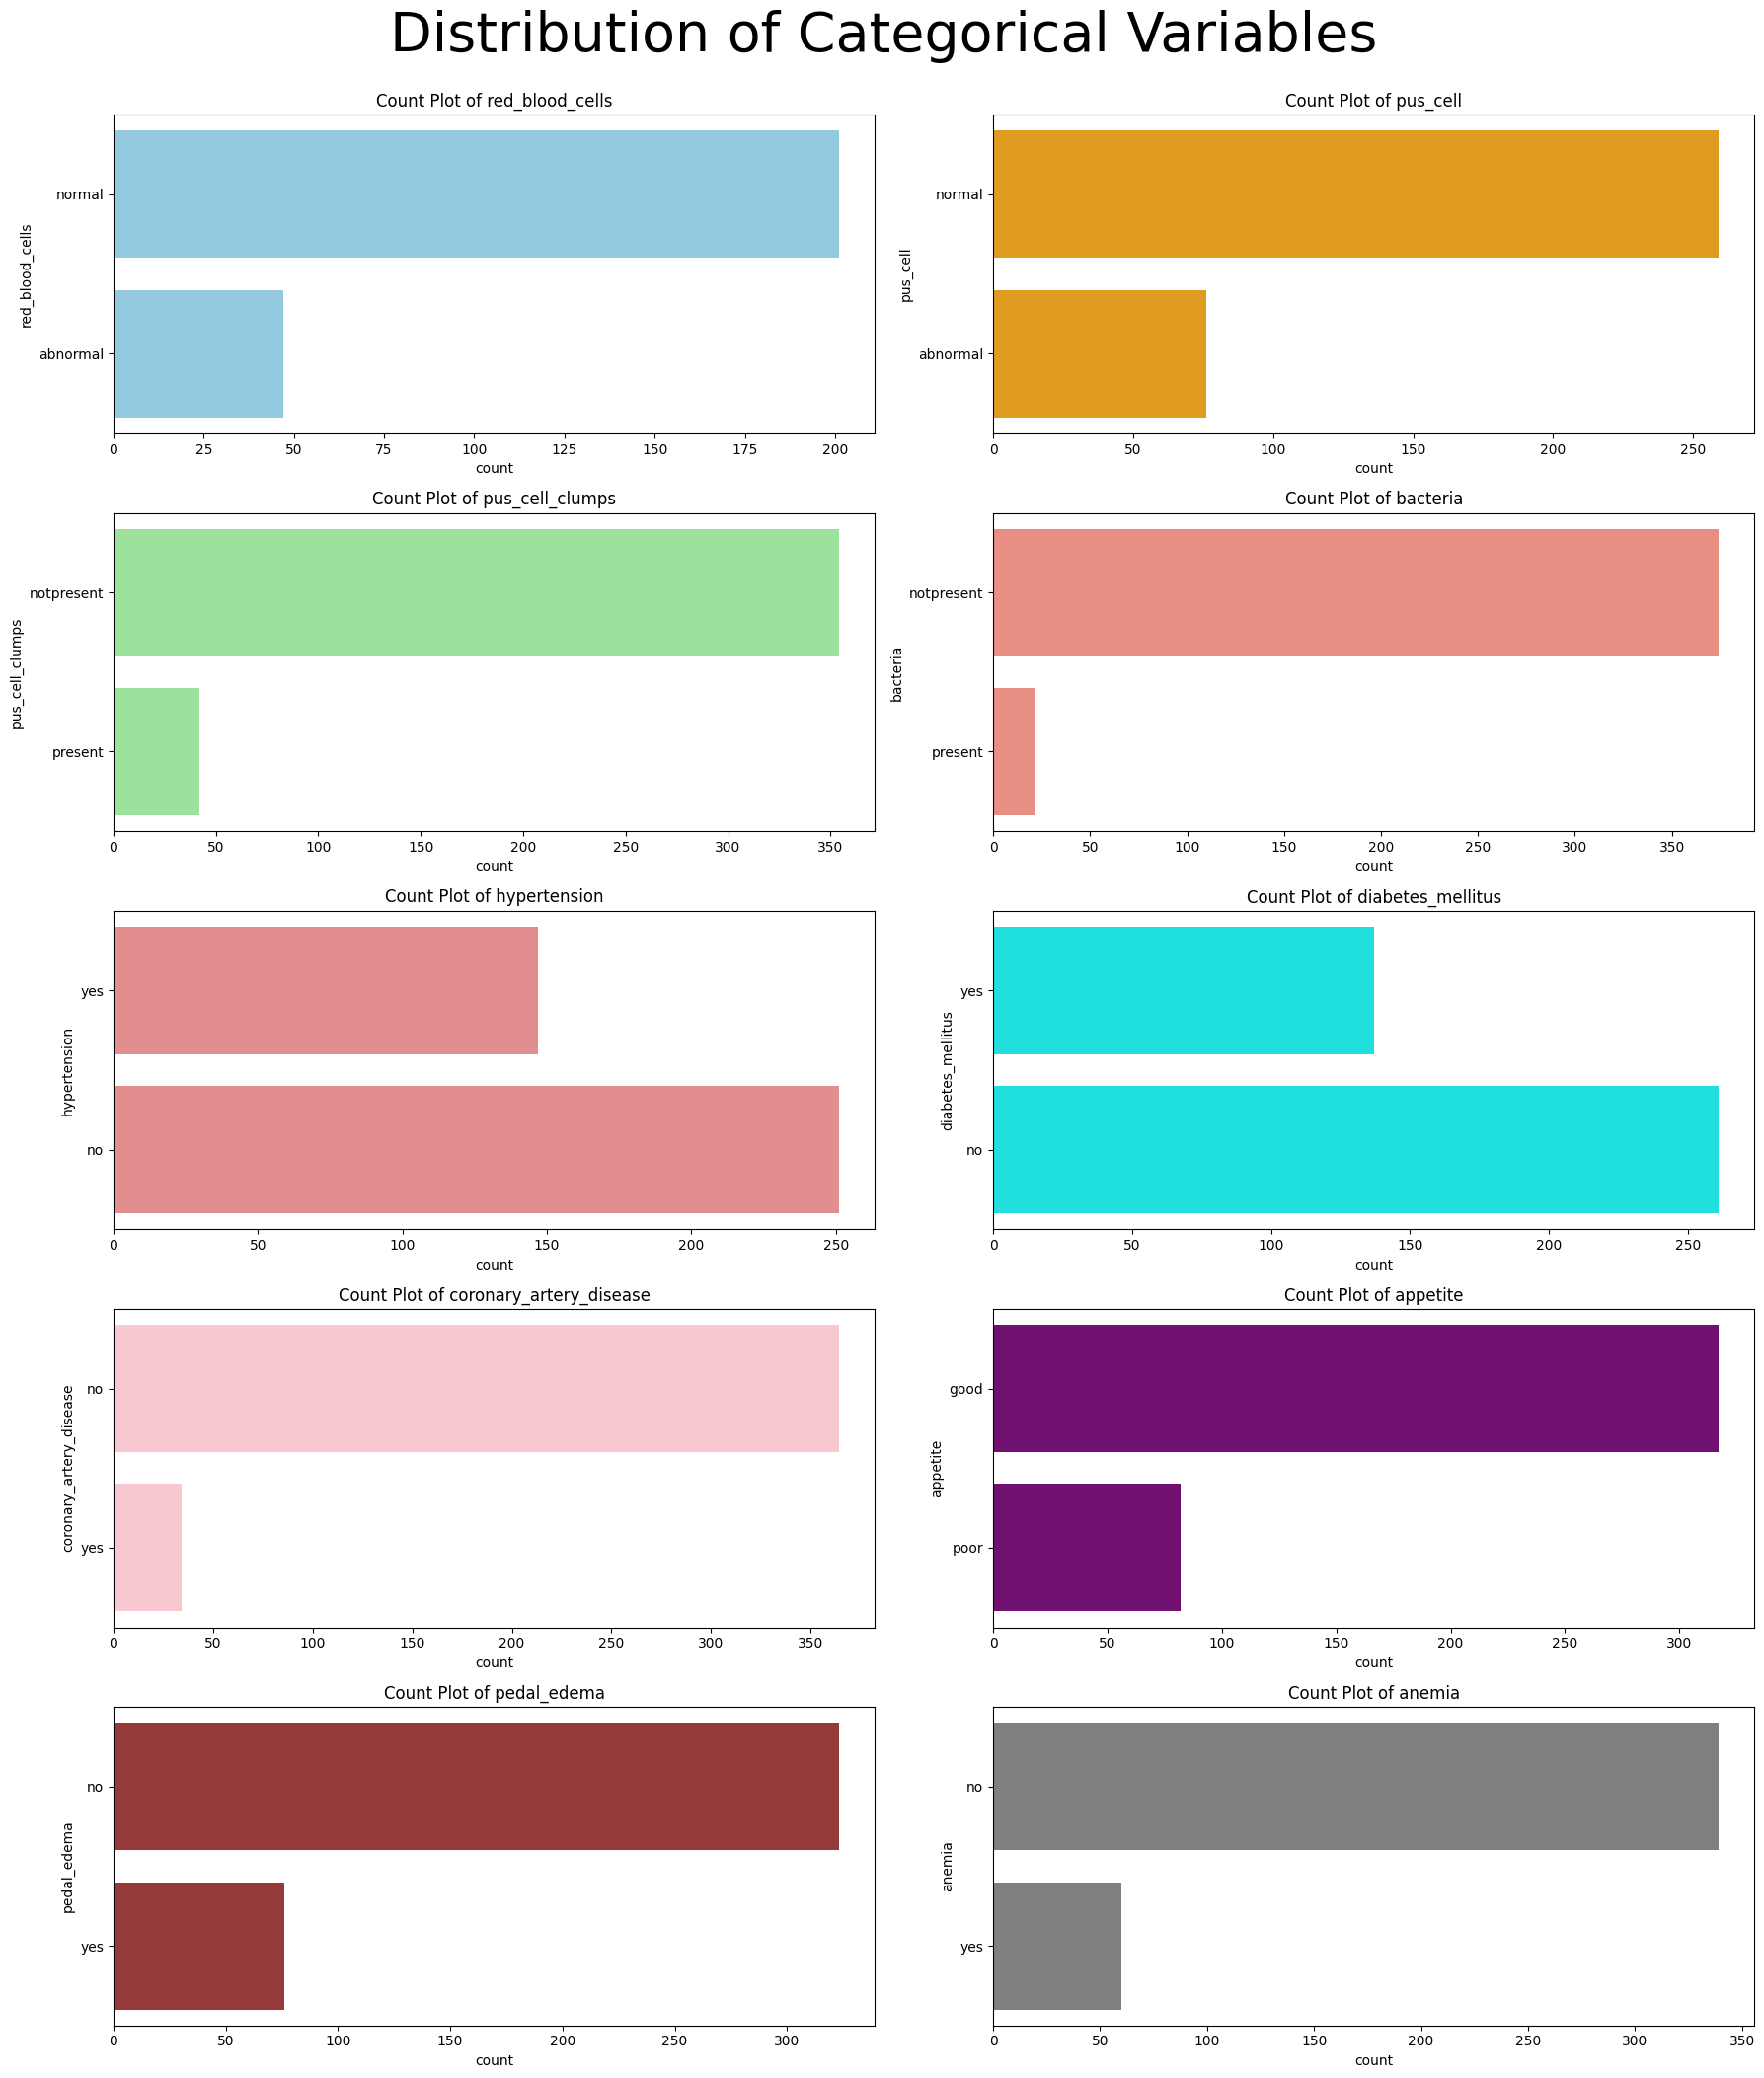

In [ ]:
import warnings
warnings.filterwarnings('ignore')

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink', 'purple', 'brown', 'grey']

plt.figure(figsize=(18, 21))
plotnumber = 1

for col, color in zip(cat_cols, colors):
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(y=df[col], palette=[color])
        plt.title(f'Count Plot of {col}')
        plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

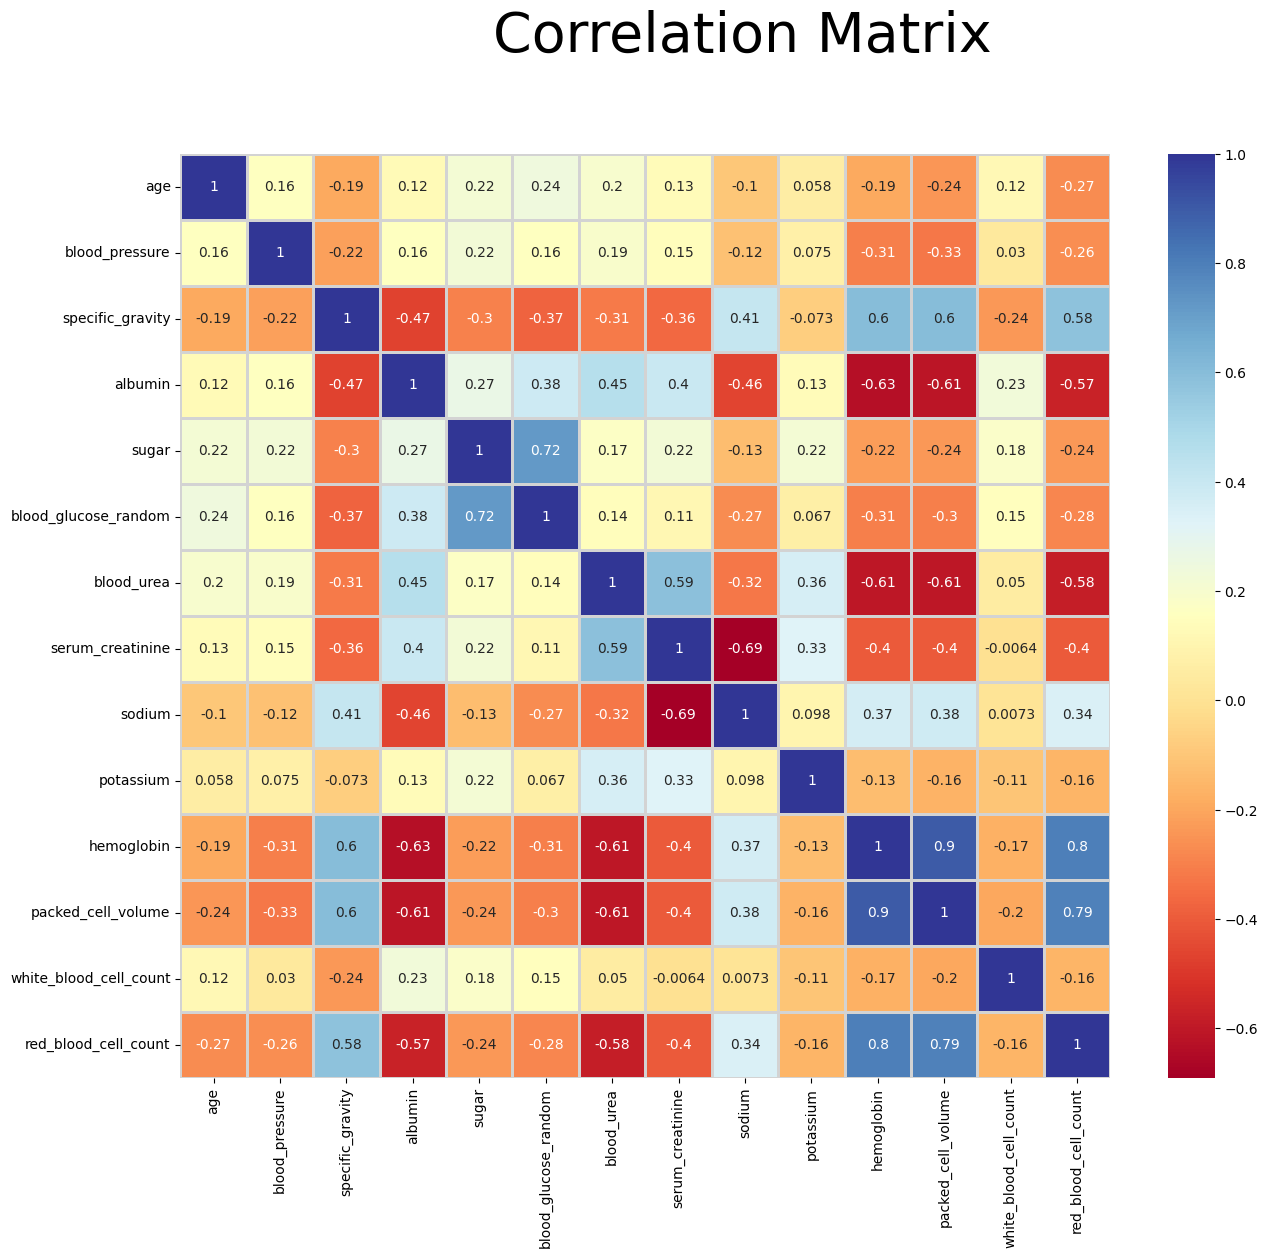

In [ ]:
num_df = df[num_cols]

plt.figure(figsize=(15, 12))
sns.heatmap(num_df.corr(), annot=True, cmap='RdYlBu', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

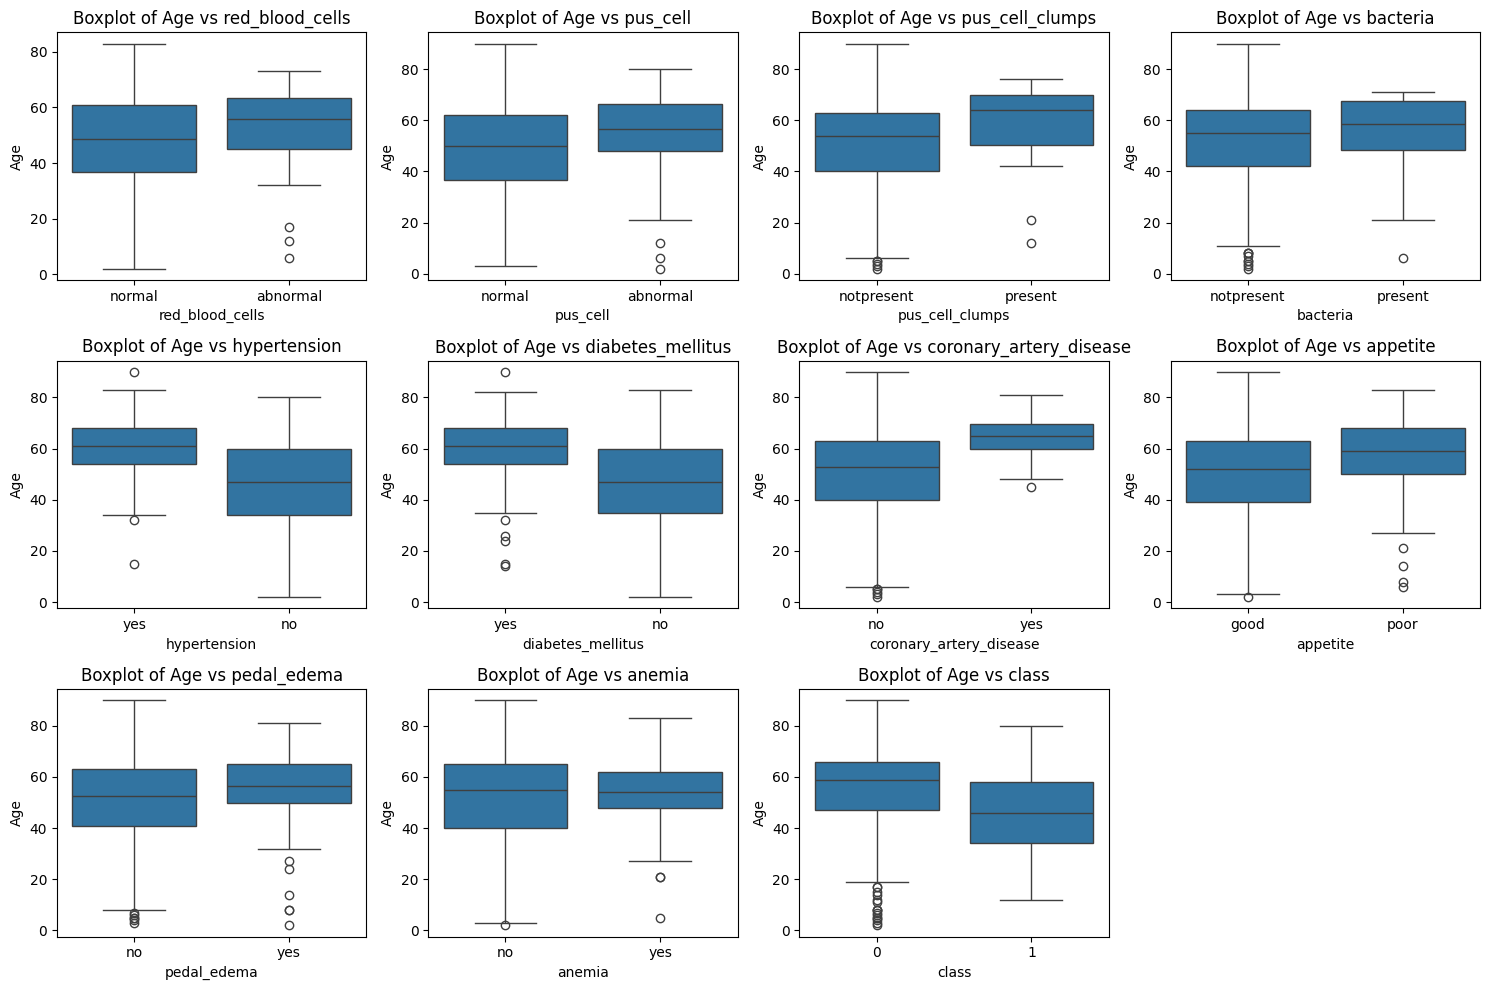

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=col, y='age', data=df)
    plt.title(f'Boxplot of Age vs {col}')
    plt.xlabel(col)
    plt.ylabel('Age')
plt.tight_layout()
plt.show()


Finding missing values in Numeric columns and visualizing it.

In [ ]:
num_missing_values = df[num_cols].isnull().sum()
num_missing_values_sorted = num_missing_values.sort_values(ascending=False)
print(num_missing_values_sorted)


red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64


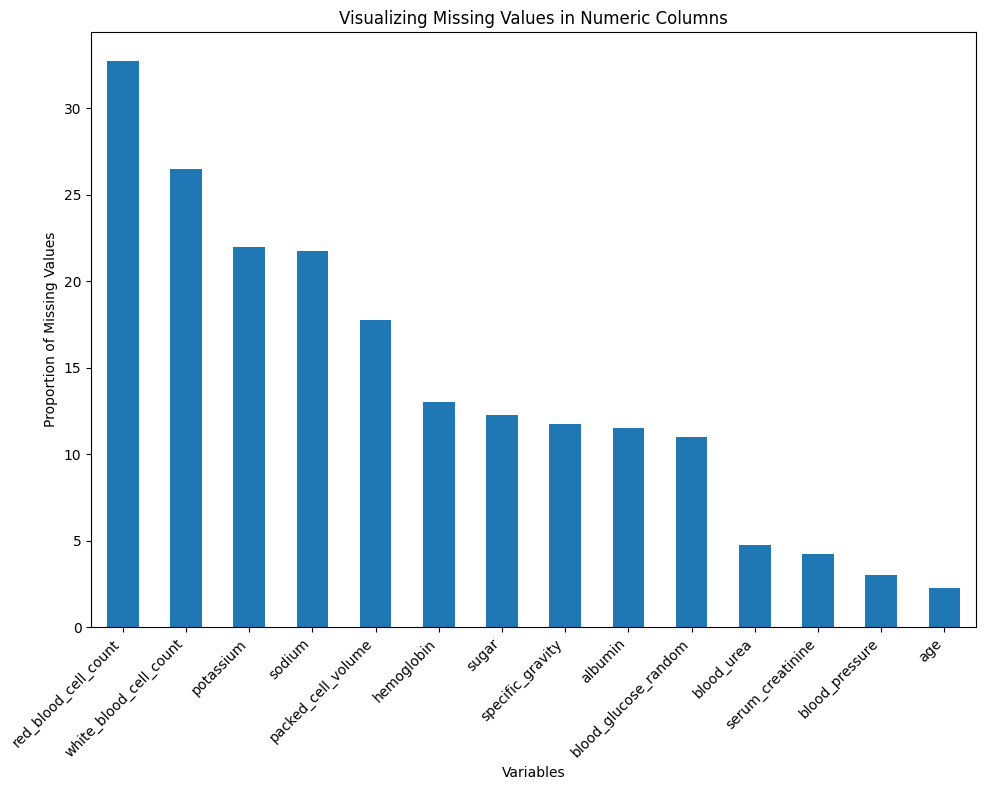

In [ ]:
missing_values = (df[num_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Finding missing vlaues in the categorical Columns and visualizing it.

In [ ]:
cat_missing = df[cat_cols].isnull().sum()
print(cat_missing)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64


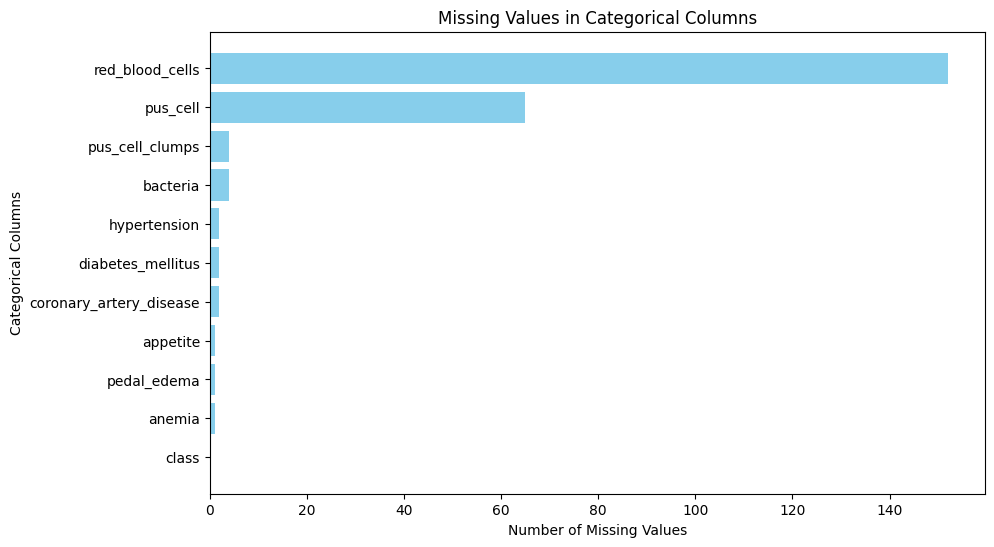

In [ ]:
missing_values = {
    'red_blood_cells': 152,
    'pus_cell': 65,
    'pus_cell_clumps': 4,
    'bacteria': 4,
    'hypertension': 2,
    'diabetes_mellitus': 2,
    'coronary_artery_disease': 2,
    'appetite': 1,
    'pedal_edema': 1,
    'anemia': 1,
    'class': 0
}

# Convert to DataFrame for easier plotting
missing_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Count'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(missing_df['Column'], missing_df['Missing_Count'], color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Categorical Columns')
plt.title('Missing Values in Categorical Columns')
plt.gca().invert_yaxis()  # Invert y-axis to show the column with the most missing values at the top
plt.show()

We are using scikit-learn's IterativeImputer to fill missing values in the numeric columns. The IterativeImputer leverages the relationship of that column with other features to predict what the missing value could be.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)

df[num_cols] = imputer.fit_transform(df[num_cols])

Then we are going through each column and replacing the missing values with other non-missing values in that column randomly. This helps in maintaing some vaiability in the input data.

In [ ]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

#Modelling

We are using the Label Encoder to convert categorical values to numeric values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
ind_col = [col for col in df.columns if col!='class']

In [ ]:
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

dataframe = X

We use the StandardScaler from sklearn library to standardize features by removing the mean and making the variance 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, X_train, y_train, X_test, y_test):
    """
    Train, predict, and evaluate a classifier.

    Parameters:
        classifier: The machine learning classifier to train and evaluate.
        model_name: A string representing the name of the model for display.
        X_train, y_train: Training data and labels.
        X_test, y_test: Testing data and labels.
    Returns:
        A dictionary with confusion matrix, accuracy, precision, recall, and F1 score.
    """
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Print the evaluation metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")

    # Return the metrics as a dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }


In [ ]:
# Check initial shapes and alignment
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Perform train-test split with proper alignment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Verify shapes and indices after split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Example with K-Nearest Neighbors model (custom implementation)
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Calculate distances and find nearest neighbors
            distances = [(np.linalg.norm(x - x_train), y_train) for x_train, y_train in zip(self.X_train, self.y_train)]
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.k]

            # Predict class based on majority vote
            class_votes = {}
            for neighbor in neighbors:
                if neighbor[1] in class_votes:
                    class_votes[neighbor[1]] += 1
                else:
                    class_votes[neighbor[1]] = 1

            predicted_class = max(class_votes, key=class_votes.get)
            y_pred.append(predicted_class)

        return np.array(y_pred)

# Instantiate and evaluate KNN model
knn_model = KNN(k=5)  # Example with k=5
model_name = "K-Nearest Neighbors"
knn_results = evaluate_model(knn_model, model_name, X_train, y_train, X_test, y_test)


X shape: (400, 24), y shape: (400,)
X_train shape: (200, 24), y_train shape: (200,)
X_test shape: (200, 24), y_test shape: (200,)
Training Accuracy of K-Nearest Neighbors: 0.92500

Confusion Matrix:
[[108  20]
 [  0  72]]

Test Accuracy of K-Nearest Neighbors: 0.90000
Test Precision of K-Nearest Neighbors: 0.89130
Test Recall of K-Nearest Neighbors: 0.92188
Test F1 Score of K-Nearest Neighbors: 0.89665

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       128
           1       0.78      1.00      0.88        72

    accuracy                           0.90       200
   macro avg       0.89      0.92      0.90       200
weighted avg       0.92      0.90      0.90       200



In [ ]:
# Check initial shapes and alignment
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Perform train-test split with proper alignment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

# Verify shapes and indices after split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}

        for c in self.classes:
            X_c = X[y == c]
            self.parameters[c] = {
                "mean": X_c.mean(axis=0),
                "var": X_c.var(axis=0),
                "prior": len(X_c) / len(X)
            }

    def calculate_likelihood(self, mean, var, x):
        eps = 1e-6  # to avoid division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
        return coeff * exponent

    def calculate_posterior(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.parameters[c]["prior"])
            likelihoods = np.sum(np.log(self.calculate_likelihood(self.parameters[c]["mean"], self.parameters[c]["var"], x)))
            posterior = prior + likelihoods
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        y_pred = [self.calculate_posterior(x) for x in X]
        return np.array(y_pred)

    def predict_proba(self, X):
        probas = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.parameters[c]["prior"])
                likelihoods = np.sum(np.log(self.calculate_likelihood(self.parameters[c]["mean"], self.parameters[c]["var"], x)))
                posteriors.append(prior + likelihoods)
            probas.append(np.exp(posteriors) / np.sum(np.exp(posteriors)))
        return np.array(probas)

# Instantiate and evaluate Gaussian Naive Bayes model
gnb_model = GaussianNaiveBayes()
model_name = "Gaussian Naive Bayes"
gnb_results = evaluate_model(gnb_model, model_name, X_train, y_train, X_test, y_test)

X shape: (400, 24), y shape: (400,)
X_train shape: (200, 24), y_train shape: (200,)
X_test shape: (200, 24), y_test shape: (200,)
Training Accuracy of Gaussian Naive Bayes: 0.95500

Confusion Matrix:
[[116   7]
 [  3  74]]

Test Accuracy of Gaussian Naive Bayes: 0.95000
Test Precision of Gaussian Naive Bayes: 0.94419
Test Recall of Gaussian Naive Bayes: 0.95206
Test F1 Score of Gaussian Naive Bayes: 0.94769

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       123
           1       0.91      0.96      0.94        77

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [ ]:
import numpy as np

# Check initial shapes and alignment
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Perform train-test split with proper alignment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# Instantiate and evaluate Logistic Regression model
logreg = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model_name = "Logistic Regression"
logreg_results = evaluate_model(logreg, model_name, X_train, y_train, X_test, y_test)

# Print results
#print("\nResults:")
#for key, value in logreg_scratch_results.items():
    #if key == "Confusion Matrix":
        #print(f"{key}:\n{value}")
    #else:
        #print(f"{key}: {value}")


X shape: (400, 24), y shape: (400,)
Training Accuracy of Logistic Regression: 0.95000

Confusion Matrix:
[[113  15]
 [  0  72]]

Test Accuracy of Logistic Regression: 0.92500
Test Precision of Logistic Regression: 0.91379
Test Recall of Logistic Regression: 0.94141
Test F1 Score of Logistic Regression: 0.92171

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       128
           1       0.83      1.00      0.91        72

    accuracy                           0.93       200
   macro avg       0.91      0.94      0.92       200
weighted avg       0.94      0.93      0.93       200



In [ ]:
import numpy as np
from collections import Counter

# Define the dataset (Example)
X = np.random.rand(400, 24)  # Feature matrix
y = np.random.randint(2, size=400)  # Target vector (binary classification)

# Check initial shapes and alignment
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Perform train-test split with proper alignment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define a simple function to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    results = {
        "Model": model_name,
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    return results

# Define the DecisionTreeClassifier class
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-6))
        return entropy

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def _find_best_split(self, X, y):
        best_split = {}
        best_score = float('inf')
        n_features = X.shape[1]

        for feature_idx in range(n_features):
            feature_values = np.unique(X[:, feature_idx])
            for value in feature_values:
                left_indices = np.where(X[:, feature_idx] <= value)[0]
                right_indices = np.where(X[:, feature_idx] > value)[0]

                if len(left_indices) >= self.min_samples_split and len(right_indices) >= self.min_samples_split:
                    left_y = y[left_indices]
                    right_y = y[right_indices]

                    current_score = self._gini(left_y) * len(left_y) / len(y) + self._gini(right_y) * len(right_y) / len(y)

                    if current_score < best_score:
                        best_score = current_score
                        best_split = {
                            "feature_idx": feature_idx,
                            "value": value,
                            "left_indices": left_indices,
                            "right_indices": right_indices
                        }

        return best_split

    def _build_tree(self, X, y, depth=0):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return Counter(y).most_common(1)[0][0]

        best_split = self._find_best_split(X, y)
        if not best_split:
            return Counter(y).most_common(1)[0][0]

        left_tree = self._build_tree(X[best_split["left_indices"]], y[best_split["left_indices"]], depth + 1)
        right_tree = self._build_tree(X[best_split["right_indices"]], y[best_split["right_indices"]], depth + 1)

        return {"feature_idx": best_split["feature_idx"], "value": best_split["value"],
                "left_tree": left_tree, "right_tree": right_tree}

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _predict_instance(self, x, tree):
        if isinstance(tree, np.int64):
            return tree
        feature_idx, value = tree["feature_idx"], tree["value"]
        if x[feature_idx] <= value:
            return self._predict_instance(x, tree["left_tree"])
        else:
            return self._predict_instance(x, tree["right_tree"])

    def predict(self, X):
        if self.tree is None:
            raise ValueError("The model has not been trained yet.")
        return np.array([self._predict_instance(x, self.tree) for x in X])

# Instantiate and evaluate Decision Tree model
dtree = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
model_name = "Decision Tree"
dtree_results = evaluate_model(dtree, model_name, X_train, y_train, X_test, y_test)

# Print results
print("\nResults:")
for key, value in dtree_results.items():
    if key in ["Confusion Matrix", "Classification Report"]:
        print(f"{key}:\n{value}")
    elif isinstance(value, float):
        print(f"{key}: {value:.5f}")
    else:
        print(f"{key}: {value}")


X shape: (400, 24), y shape: (400,)

Results:
Model: Decision Tree
Training Accuracy: 0.71000
Test Accuracy: 0.54500
Precision: 0.58065
Recall: 0.35644
F1 Score: 0.44172
Confusion Matrix:
[[73 26]
 [65 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.74      0.62        99
           1       0.58      0.36      0.44       101

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.53       200
weighted avg       0.56      0.55      0.53       200



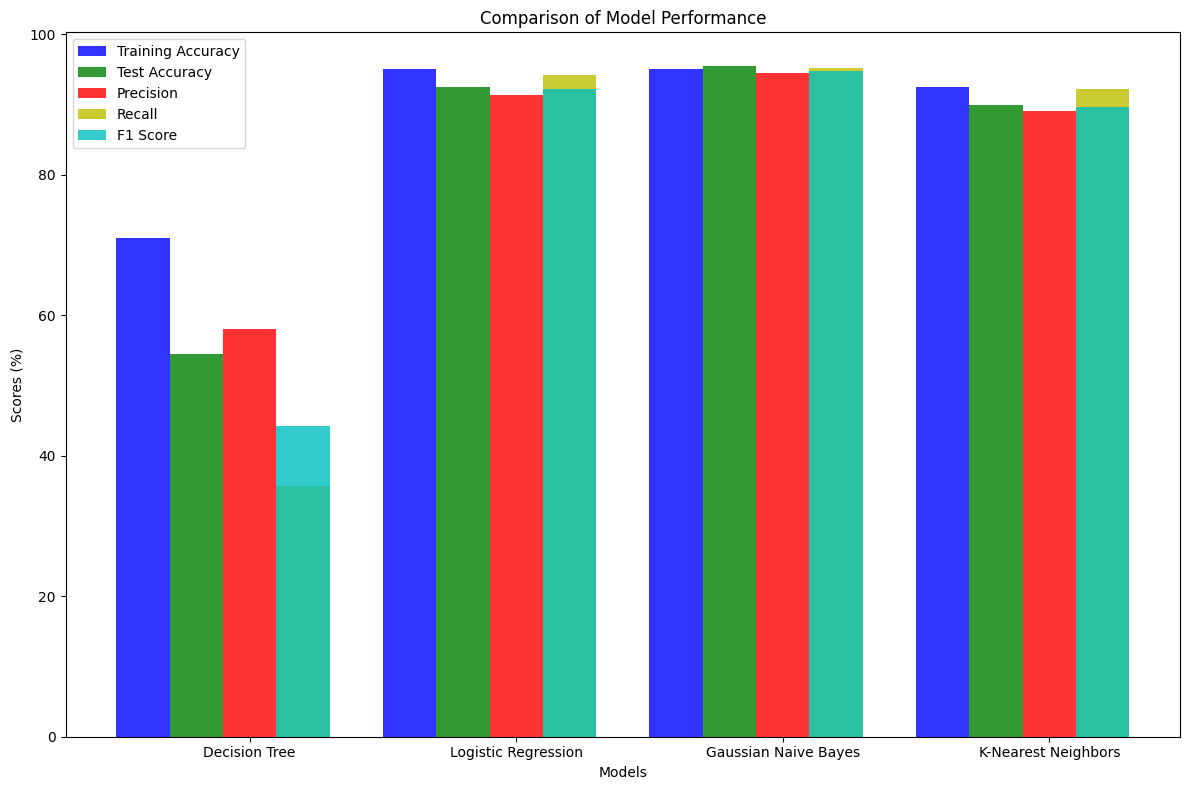

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'K-Nearest Neighbors']
training_accuracy = [71.00, 95.00, 95.00, 92.50]
test_accuracy = [54.50, 92.50, 95.50, 90.00]
precision = [58.06, 91.38, 94.42, 89.13]
recall = [35.64, 94.14, 95.21, 92.19]
f1_score = [44.17, 92.17, 94.77, 89.67]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
opacity = 0.8

index = list(range(len(models)))
index1 = [i + bar_width for i in index]
index2 = [i + bar_width for i in index1]
index3 = [i + bar_width for i in index2]

rects1 = plt.bar(index, training_accuracy, bar_width, alpha=opacity, color='b', label='Training Accuracy')
rects2 = plt.bar(index1, test_accuracy, bar_width, alpha=opacity, color='g', label='Test Accuracy')
rects3 = plt.bar(index2, precision, bar_width, alpha=opacity, color='r', label='Precision')
rects4 = plt.bar(index3, recall, bar_width, alpha=opacity, color='y', label='Recall')
rects5 = plt.bar(index3, f1_score, bar_width, alpha=opacity, color='c', label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.title('Comparison of Model Performance')
plt.xticks([i + 2 * bar_width for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()
